In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("/content/drive/MyDrive/EDA/EDA/GooglePlayStore EDA/cleaned_dataset.xlsx")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7041 non-null   object 
 1   Category        7041 non-null   object 
 2   Rating          7041 non-null   float64
 3   Reviews         7041 non-null   int64  
 4   Size            7041 non-null   object 
 5   Installs        7041 non-null   int64  
 6   Type            7041 non-null   object 
 7   Price           7041 non-null   float64
 8   Content Rating  7041 non-null   object 
 9   Genres          7041 non-null   object 
 10  Current Ver     7041 non-null   object 
 11  Android Ver     7041 non-null   float64
 12  Day             7041 non-null   int64  
 13  Month           7041 non-null   int64  
 14  Year            7041 non-null   int64  
 15  clean Ver       7041 non-null   float64
dtypes: float64(4), int64(5), object(7)
memory usage: 880.3+ KB


In [12]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year,clean Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0,7,1,2018,1.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0,15,1,2018,2.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0,1,8,2018,1.2
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4,20,6,2018,1.1
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,1.0,2.3,26,3,2017,1.0


In [13]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year,clean Ver
7036,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0.0,Everyone,Weather,6.0,2.1,16,2,2014,6.00
7037,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0.0,Everyone,Books & Reference,0.8,2.2,23,3,2014,0.80
7038,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,1.0.0,4.1,18,6,2017,1.00
7039,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,1.48,4.1,25,7,2017,1.48
7040,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,1.0,4.1,6,7,2018,1.00


In [14]:
df.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year,clean Ver
737,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13M,10000000,Free,0.0,Everyone,Health & Fitness,1.0.2,4.2,21,6,2018,1.0
1757,Hovercraft Racer,SPORTS,4.0,218,28M,100000,Free,0.0,Everyone,Sports,5.0,4.1,19,7,2018,5.0


###So there are 7041 rows in our cleaned dataset

In [5]:
df.shape

(7041, 16)

### The total installs across all categories is 34.37 Billion.

In [24]:
total_installs = df['Installs'].sum()
print(total_installs)

34372748468


###So the top 5 categories are:-
1. GAME
2. FAMILY
3. TOOLS
4. COMMUNICATION
5. PHOTOGRAPHY

In [10]:
df.groupby('Category')['Installs'].sum().sort_values(ascending= False).head()

,Installs
Category,
GAME,12839952667
FAMILY,3745556490
TOOLS,2823648450
COMMUNICATION,2532100430
PHOTOGRAPHY,1954493130


In [25]:
top10_df = df.groupby(['Category', 'Type'])['Installs'].sum().sort_values(ascending = False).reset_index().head(10)
top10_df

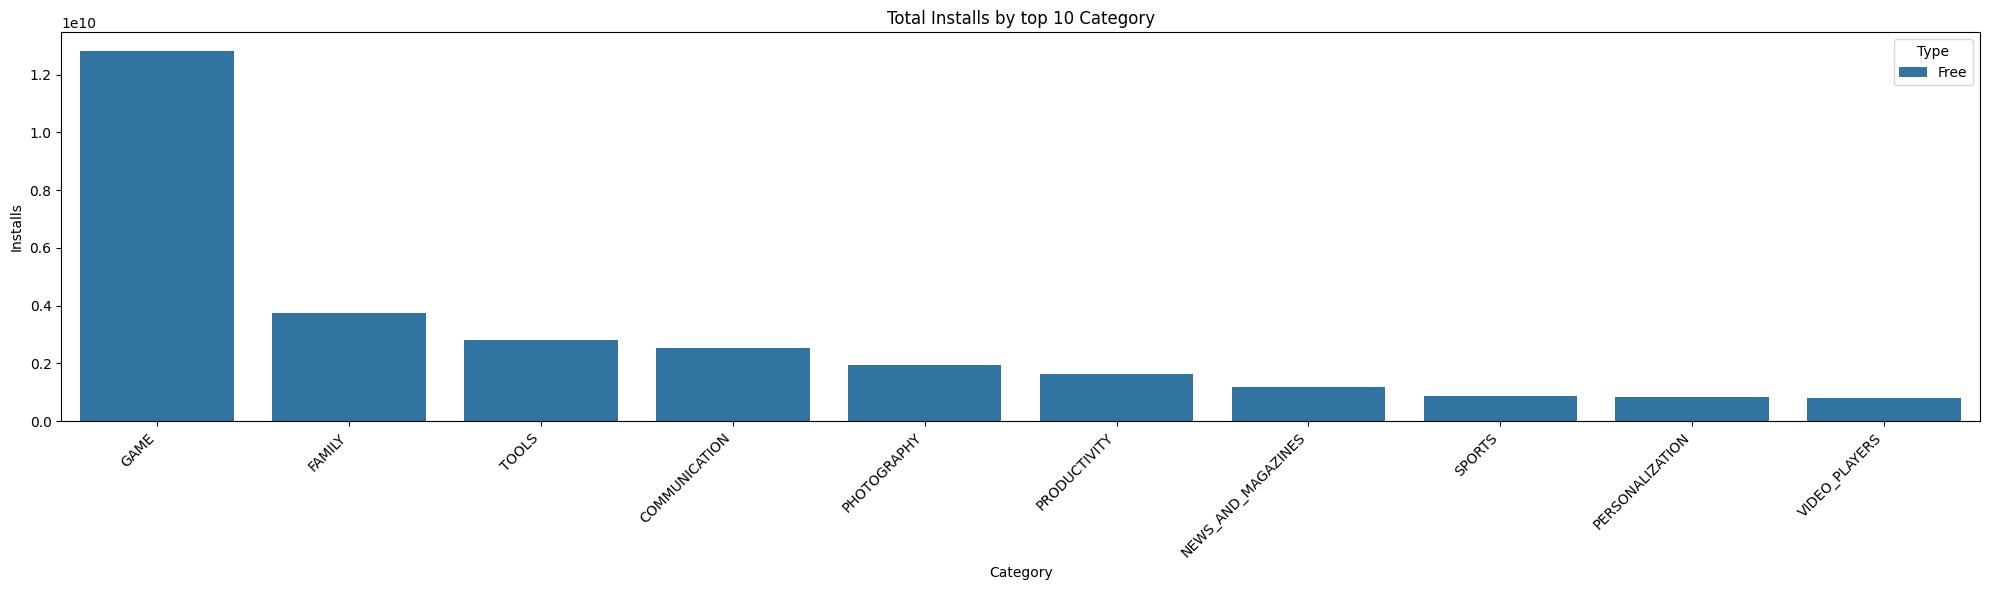

In [19]:
plt.figure(figsize=(20, 6))
sns.barplot(data=top10_df, x='Category', y='Installs', hue='Type')
plt.title('Total Installs by top 10 Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
bottom10_df = df.groupby(['Category', 'Type'])['Installs'].sum().sort_values(ascending = False).reset_index().tail(10)
bottom10_df

,Category,Type,Installs
50,PARENTING,Paid,50100
51,FOOD_AND_DRINK,Paid,50000
52,MAPS_AND_NAVIGATION,Paid,21100
53,BOOKS_AND_REFERENCE,Paid,17650
54,ART_AND_DESIGN,Paid,16000
55,DATING,Paid,11100
56,VIDEO_PLAYERS,Paid,11000
57,SHOPPING,Paid,10100
58,SOCIAL,Paid,6000
59,NEWS_AND_MAGAZINES,Paid,5500


###Total percentage of free apps is 92.40

In [20]:
# Total number of apps
total_apps = len(df)

# Number of free apps
free_apps = len(df[df['Type'] == 'Free'])

# Percentage
percentage_free = (free_apps / total_apps) * 100

print(f"Percentage of free apps: {percentage_free:.2f}%")


Percentage of free apps: 92.40%


# 🔍 Key Insights from Play Store Analysis

1. 📱 **Most Popular Categories**:
   - GAME and FAMILY dominate the app landscape.

2. ⭐ **Ratings Matter**:
   - Apps with higher reviews tend to have higher ratings (r ≈ 0.65).

3. 💰 **Free vs Paid Apps**:
   - 92% of apps are free.

4. 🔁 **Install Trends**:
   - GAME apps lead with the highest number of installs, totaling approximately 12.82 billion+. This suggests the dominance of gaming in user engagement and popularity on the Play Store.
   - FAMILY and TOOLS categories also perform well, totaling approximately 6.55 billion+ installs combined.

5. 🛠️ **Underperformers**:
   - SOCIAL & NEWS_AND_MAGAZINES apps have low install and engagement.
